In [1]:
import numpy as np
from scipy import linalg
from scipy.special import binom
import matplotlib.pyplot as plt
import itertools as it
import copy
import stomp_functions as stf
import time
import os
import re
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from qiskit.quantum_info import random_clifford

In [2]:
class TOLcmaps(object):
    """
    Class TOLcmaps definition.
    """
    def __init__(self):
        """
        """
        self.cmap = None
        self.cname = None
        self.namelist = (
            'rainbow_PuRd',)

        self.funcdict = dict(
            zip(self.namelist,
                (self.__rainbow_PuRd,
                )
               )
        )
        
    def __rainbow_PuRd(self):
        """
        Define colormap 'rainbow_PuRd'.
        """
        clrs = ['#6F4C9B', '#6059A9', '#5568B8', '#4E79C5', '#4D8AC6',
                '#4E96BC', '#549EB3', '#59A5A9', '#60AB9E', '#69B190',
                '#77B77D', '#8CBC68', '#A6BE54', '#BEBC48', '#D1B541',
                '#DDAA3C', '#E49C39', '#E78C35', '#E67932', '#E4632D',
                '#DF4828', '#DA2222']
        self.cmap = LinearSegmentedColormap.from_list(self.cname, clrs)
        self.cmap.set_bad('#FFFFFF')
        
    def get(self, cname='rainbow_PuRd', lut=None):
        """
        Return requested colormap, default is 'rainbow_PuRd'.
        """
        self.cname = cname
        if cname == 'rainbow_discrete':
            self.__rainbow_discrete(lut)
        else:
            self.funcdict[cname]()
        return self.cmap

In [3]:
def tol_cmap(colormap=None, lut=None):
    """
    Continuous and discrete color sets for ordered data.
    
    Return a matplotlib colormap.
    Parameter lut is ignored for all colormaps except 'rainbow_discrete'.
    """
    obj = TOLcmaps()
    if colormap is None:
        return obj.namelist
    if colormap not in obj.namelist:
        colormap = 'rainbow_PuRd'
        print('*** Warning: requested colormap not defined,',
              'known colormaps are {}.'.format(obj.namelist),
              'Using {}.'.format(colormap))
    return obj.get(colormap, lut)

In [4]:
def create_H(N, g, j):
    z_ops, x_ops = stf.construct_op_lists(N)
    
    # Construct the Hamiltonian
    # Loop over sites to construct parts of H
    H_qis = 0
    for n in range(N-1):
        H_qis += -j * z_ops[n] @ z_ops[n+1]
        for m in range(N):
            H_qis += -j * g * x_ops[m]

    return H_qis

In [5]:
# Set font size of plot elements
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
# Define Hamiltonian parameters
N = 3
g = 2
j = 1

In [7]:
# Set up parameters for unitary
τ = 1
num_steps = 100
τs, dτ = np.linspace(0, τ, num_steps, retstep=True)

In [8]:
H = create_H(N, g, j)
E = linalg.eigvalsh(H.to_matrix())

In [9]:
ovlp_file = "estimator_ovlp_N=" + str(N) + "_" + 'qasm' + "_b=" + str(τ) + "_numsteps=" + str(
        num_steps) + "_g=" + str(g) + ".npz"
H_ovlp_file = "estimator_H_ovlp_N=" + str(N) + "_" + 'qasm' + "_b=" + str(τ) + "_numsteps=" + str(
        num_steps) + "_g=" + str(g) + ".npz"

In [10]:
# Load data
z = np.load(ovlp_file, allow_pickle=True)
O = np.load(H_ovlp_file, allow_pickle=True)

In [11]:
avg_z = np.mean(list(z.values()), axis=0)
avg_O = np.mean(list(O.values()), axis=0)

Text(0, 0.5, 'Im(Ovlp)')

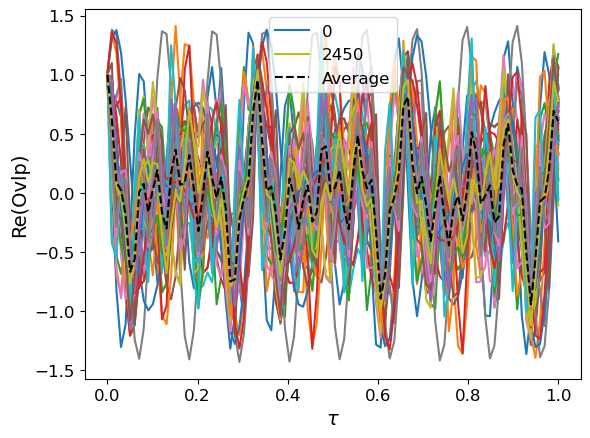

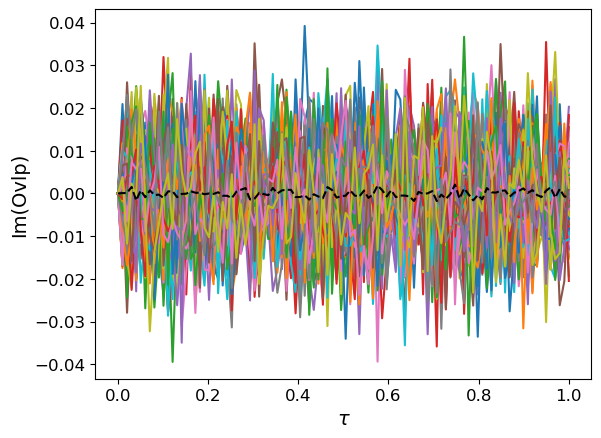

In [12]:
# Just plot all the overlap data
fig = plt.figure(1)
ax = fig.add_subplot(111)
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111)
for key in z:
    if key == list(z.keys())[0] or key == list(z.keys())[-1]:
        ax.plot(τs, z[key].real, label=key)
        ax2.plot(τs, z[key].imag, label=key)
    else:
        ax.plot(τs, z[key].real)
        ax2.plot(τs, z[key].imag)

ax.plot(τs, avg_z.real, 'k--', label='Average')
ax2.plot(τs, avg_z.imag, 'k--')
ax.set_xlabel("$\\tau$")
ax.set_ylabel("Re(Ovlp)")
ax.legend()

ax2.set_xlabel("$\\tau$")
ax2.set_ylabel("Im(Ovlp)")

Text(0, 0.5, 'Im(Ovlp)')

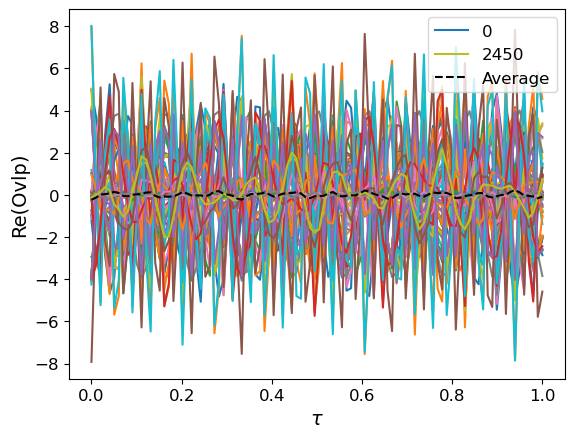

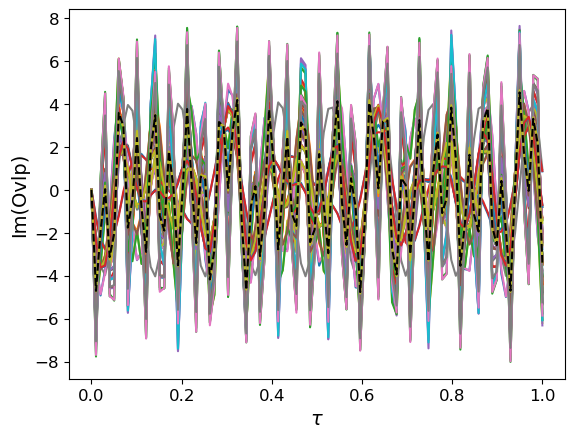

In [13]:
# Just plot all the overlap data
fig = plt.figure(1)
ax = fig.add_subplot(111)
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111)
for key in z:
    if key == list(z.keys())[0] or key == list(z.keys())[-1]:
        ax.plot(τs, O[key].real, label=key)
        ax2.plot(τs, O[key].imag, label=key)
    else:
        ax.plot(τs, O[key].real)
        ax2.plot(τs, O[key].imag)

ax.plot(τs, avg_O.real, 'k--', label='Average')
ax2.plot(τs, avg_O.imag, 'k--')
ax.set_xlabel("$\\tau$")
ax.set_ylabel("Re(Ovlp)")
ax.legend()

ax2.set_xlabel("$\\tau$")
ax2.set_ylabel("Im(Ovlp)")

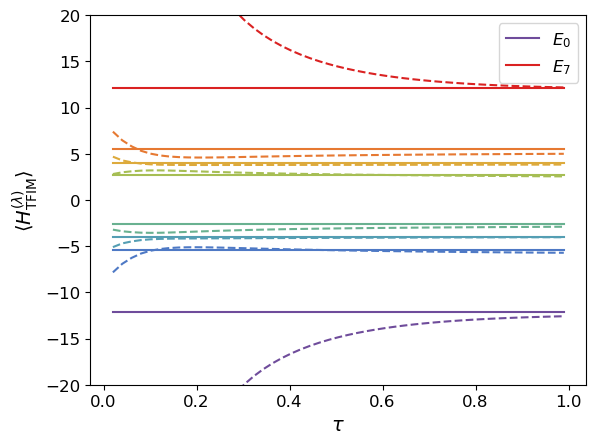

In [17]:
colors = tol_cmap('rainbow_PuRd').resampled(E.size)
for i, λ in enumerate(E):
    if i == 0 or i == E.size-1:
        plt.plot(τs[2::2], λ * np.ones(τs[2::2].size), color=colors(i), label='$E_'+str(i)+'$')
    else:
        plt.plot(τs[2::2], λ * np.ones(τs[2::2].size), color=colors(i))
    
    plt.plot(τs[2::2], stf.alt_partition_calc(avg_z, avg_O, num_steps, λ, dτ)[1][1:] - λ,
            '--', color=colors(i))
plt.xlabel("$\\tau$")
plt.ylabel("$\\langle H^{(\\lambda)}_{\\mathrm{TFIM}} \\rangle$")
plt.ylim([-20, 20])
plt.legend()
plt.savefig("estimator_sim_3_sites.png", format='png', dpi=300)

In [18]:
λs = np.linspace(-1.1 * abs(E[0]), 1.1 * abs(E[0]), 100)
calculated_energies = [stf.alt_partition_calc(avg_z, avg_O,
                                                  num_steps, _, dτ)[1][-1]
                      for _ in λs]

In [ ]:
for i, e in enumerate(E):
    plt.plot(λs / abs(E[0]), e * np.ones(λs.shape[0]) + λs,
            '-.', color=colors(i))
    plt.plot(λs / abs(E[0]), calculated_energies, 'k')
    
plt.ylabel("$\\langle H^{(\\lambda)}_{\\mathrm{TFIM}} \\rangle(\\tau \\rightarrow \\infty)$")
plt.xlabel("$\\lambda/|E_0|$")
plt.savefig("estimator_sweep_results.png", format='png', dpi=300)